In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
%matplotlib inline

The data are from Rezvanbehbahani et al., 2017: https://github.com/amirkdv/ghf-greenland-gbrt/blob/master/global.csv

In [3]:
fin = 'R17_global_raw.csv'

df = pd.read_csv(fin)
df.shape, df.columns

((4034, 24), Index(['FID', 'thermo_tecto_age', 'thickness_upper_crust',
        'thickness_middle_crust', 'upper_mantle_density_anomaly', 'd_2_ridge',
        'd_2_trench', 'd_2_trans_ridge', 'd_2_volcano', 'd_2_hotspot',
        'heat_prod_provinces', 'thickness_crust', 'd_2_young_rift', 'lon',
        'lat', 'GHF', 'upper_mantle_vel_structure', 'rock_type', 'age',
        'magnetic_anomaly', 'depth_to_moho', 'lithos_asthenos_bdry',
        'bougeur_gravity_anomaly', 'topography'],
       dtype='object'))

In [4]:
# Drop unused columns
for key in ['FID', 'heat_prod_provinces', 'thermo_tecto_age', 'rock_type']:
    df.drop([key], axis=1, inplace=True)

df.shape, df.columns

((4034, 20), Index(['thickness_upper_crust', 'thickness_middle_crust',
        'upper_mantle_density_anomaly', 'd_2_ridge', 'd_2_trench',
        'd_2_trans_ridge', 'd_2_volcano', 'd_2_hotspot', 'thickness_crust',
        'd_2_young_rift', 'lon', 'lat', 'GHF', 'upper_mantle_vel_structure',
        'age', 'magnetic_anomaly', 'depth_to_moho', 'lithos_asthenos_bdry',
        'bougeur_gravity_anomaly', 'topography'],
       dtype='object'))

In [6]:
# Split data into training and test
train, test = train_test_split(
    df,
    test_size=.2,
    random_state=1,
    shuffle=True,
)
train.to_csv('R17_global_train.csv', index=False)
test.to_csv('R17_global_test.csv', index=False)

Validate the split.

(4034, 20) (3227, 20) (807, 20)


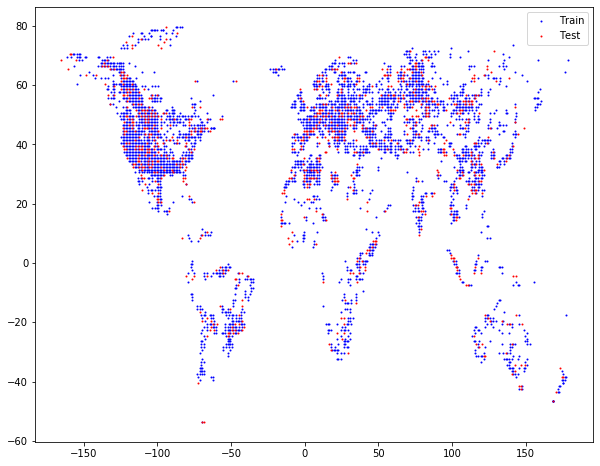

In [7]:
print(df.shape, train.shape, test.shape)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(train['lon'], train['lat'], s=1, c='b', label='Train')
ax.scatter(test['lon'], test['lat'], s=1, c='r', label='Test')
ax.legend()
plt.show()

(4034, 20) (3227, 20) (807, 20)


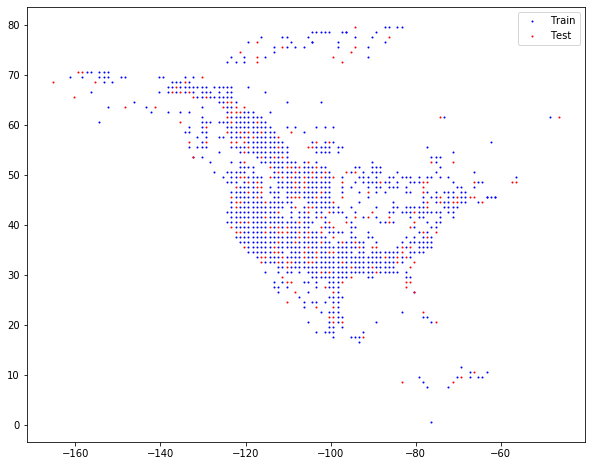

In [21]:
print(df.shape, train.shape, test.shape)

na_train_idx = (train.lat > 0)  & (train.lon < -25)
na_test_idx = (test.lat > 0) & (test.lon < -25)

na_train = train[na_train_idx]
na_test = test[na_test_idx]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(na_train['lon'], na_train['lat'], s=1, c='b', label='Train')
ax.scatter(na_test['lon'], na_test['lat'], s=1, c='r', label='Test')
ax.legend()
plt.show()

(4034, 20) (3227, 20) (807, 20)


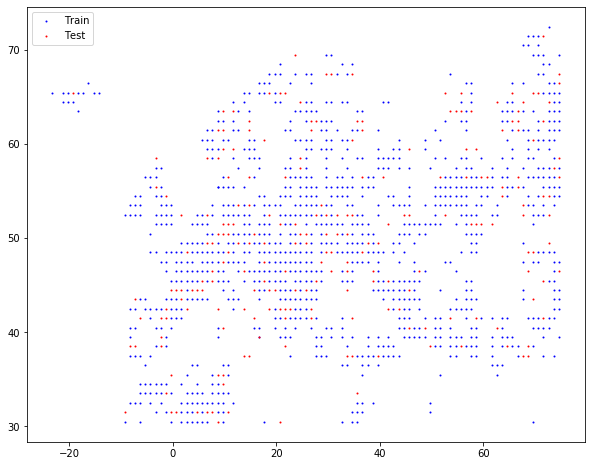

In [22]:
print(df.shape, train.shape, test.shape)

eu_train_idx = (train.lat > 30)  & (75 > train.lon) & (train.lon > -25)
eu_test_idx = (test.lat > 30) & (75 > test.lon) & (test.lon > -25)

eu_train = train[eu_train_idx]
eu_test = test[eu_test_idx]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(eu_train['lon'], eu_train['lat'], s=1, c='b', label='Train')
ax.scatter(eu_test['lon'], eu_test['lat'], s=1, c='r', label='Test')
ax.legend()
plt.show()

In [14]:
train[(train.lat > 0)  & (train.lon < -25)]

,thickness_upper_crust,thickness_middle_crust,upper_mantle_density_anomaly,d_2_ridge,d_2_trench,d_2_trans_ridge,d_2_volcano,d_2_hotspot,thickness_crust,d_2_young_rift,lon,lat,GHF,upper_mantle_vel_structure,age,magnetic_anomaly,depth_to_moho,lithos_asthenos_bdry,bougeur_gravity_anomaly,topography
172,16.004,15.0,0.0100,1286.40,1270.39,2149.25,887.95,14.916434,41.000000,802.55,-114.333313,58.500122,63.616600,1.0,2.819458,-179.996002,-37.145302,291996.00000,70.873497,245.365997
857,10.002,10.0,0.0102,2040.27,1735.43,1852.51,2366.71,18.668155,39.509998,944.56,-78.333313,36.500122,47.403400,4.0,1.636916,-31.162001,-30.701700,196135.00000,136.341995,117.109001
385,16.000,17.0,0.0192,2952.03,2870.12,2951.24,2036.97,21.505813,46.459999,1307.97,-87.333313,48.500122,38.171902,1.0,2.478223,382.250000,-39.485199,224852.00000,106.319000,-18.555100
702,19.000,12.0,0.0212,2585.74,2287.48,2407.76,2557.52,20.940392,40.299999,1059.42,-78.333313,41.500122,52.653400,2.0,1.948918,-63.245201,-37.140800,191696.00000,95.729103,548.616028
642,16.004,17.0,0.0168,2666.46,2485.77,2581.15,2280.52,22.461077,45.970001,806.60,-82.333313,42.500122,41.561401,2.0,2.282240,-143.328003,-36.945599,259342.00000,102.509003,174.852997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,15.000,15.0,-0.0041,1170.30,1072.60,2181.83,735.85,17.219175,41.000000,869.69,-118.333313,59.500122,75.284103,1.0,2.342446,-76.697700,-40.379200,308641.00000,64.060097,545.497986
905,16.003,16.0,-0.0035,1667.14,1860.52,1777.93,1153.54,7.516648,39.009998,426.68,-96.333313,35.500122,51.475399,2.0,1.952218,65.203201,-29.525999,179739.00000,96.870499,256.621002
1096,7.000,8.0,0.0157,1571.33,1579.04,1676.78,1204.37,10.977249,40.889999,546.33,-94.333313,30.500122,58.900002,4.0,1.869454,-200.026001,-27.668501,85353.60156,118.695999,40.664398
235,15.501,16.0,0.0059,1966.29,1824.45,2323.79,1404.25,14.159802,40.130001,1179.81,-101.333313,54.500122,35.941799,2.0,2.615656,458.226990,-38.523701,279570.00000,78.878197,298.289002
